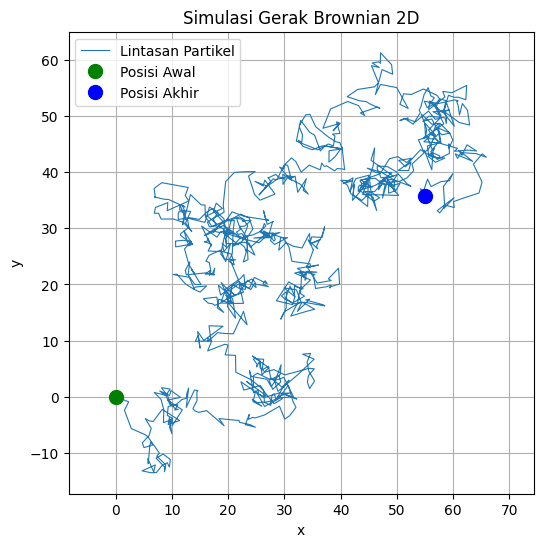

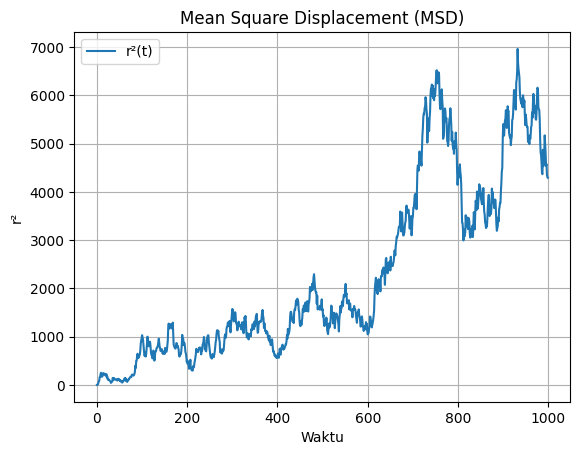

MSD akhir (t = 1000.0) ≈ 2281.59


In [58]:
import numpy as np
import matplotlib.pyplot as plt

# --- Parameter simulasi ---
n_steps = 1000           # Jumlah langkah waktu
dt = 1.0                 # Interval waktu per langkah
D = 1.0                  # Koefisien difusi
sigma = np.sqrt(2 * D * dt)  # Standar deviasi langkah acak
np.random.seed(1)

# --- Inisialisasi posisi ---
x = np.zeros(n_steps)
y = np.zeros(n_steps)
# --- Simulasi Gerak Acak ---
for i in range(1, n_steps):
    dx = np.random.normal(0, sigma)
    dy = np.random.normal(0, sigma)
    x[i] = x[i-1] + dx
    y[i] = y[i-1] + dy

# --- Plot Lintasan Partikel ---
plt.figure(figsize=(6, 6))
plt.plot(x, y, lw=0.8, label='Lintasan Partikel')
plt.plot(x[0], y[0],  'go', markersize=10, label='Posisi Awal')
plt.plot(x[-1], y[-1], 'bo', markersize=10, label='Posisi Akhir')
plt.title('Simulasi Gerak Brownian 2D')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.legend()
plt.grid(True)
plt.show()

# --- Hitung Mean Square Displacement (MSD) ---
r_squared = x**2 + y**2
msd = np.mean(r_squared)

# --- Plot MSD terhadap waktu ---
plt.figure()
plt.plot(np.arange(n_steps) * dt, r_squared, label='r²(t)')
plt.title('Mean Square Displacement (MSD)')
plt.xlabel('Waktu')
plt.ylabel('r²')
plt.grid(True)
plt.legend()
plt.show()

print(f"MSD akhir (t = {n_steps*dt}) ≈ {msd:.2f}")


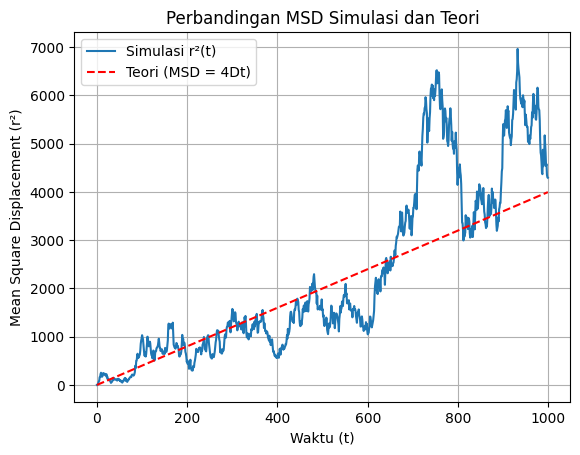

MSD akhir (simulasi) pada t=999.0 ≈ 4294.39
MSD akhir (teori) pada t=999.0 ≈ 3996.00


In [59]:
# --- Hitung Mean Square Displacement (MSD) ---
t = np.arange(n_steps) * dt
r_squared = x**2 + y**2
msd_theoretical = 4 * D * t # Persamaan teoretis

# --- Plot MSD terhadap waktu ---
plt.figure()
plt.plot(t, r_squared, label='Simulasi r²(t)')
plt.plot(t, msd_theoretical, 'r--', label='Teori (MSD = 4Dt)') # Garis teoretis
plt.title('Perbandingan MSD Simulasi dan Teori')
plt.xlabel('Waktu (t)')
plt.ylabel('Mean Square Displacement (r²)')
plt.grid(True)
plt.legend()
plt.show()

print(f"MSD akhir (simulasi) pada t={t[-1]} ≈ {r_squared[-1]:.2f}")
print(f"MSD akhir (teori) pada t={t[-1]} ≈ {msd_theoretical[-1]:.2f}")

In [64]:
import numpy as np
import time

# --- Parameter Simulasi ---
n_steps_variations = [10**2, 15**2, 10**3, 15**3, 10**4, 15**4, 10**5, 15**5, 10**6]
n_runs = 10  # Jumlah pengulangan untuk setiap variasi n_steps
dt = 1.0
D = 1.0
sigma = np.sqrt(2 * D * dt)

print("Memulai Simulasi Gerak Brownian dengan Variasi n_steps")
print("-" * 60)
error_percents_nstep = []  # Untuk menyimpan persentase kesalahan
# --- Loop untuk setiap variasi n_steps ---
for n_steps in n_steps_variations:
    print(f"\n>>> Memproses untuk n_steps = {n_steps:,.0f}")
    
    final_r_squared = []
    total_time_start = time.time()

    # --- Lakukan simulasi sebanyak n_runs ---
    for i in range(n_runs):
        run_time_start = time.time()
        
        # Inisialisasi posisi awal
        x, y = 0.0, 0.0
        
        # Simulasi gerak acak (tanpa menyimpan histori posisi)
        # Ini lebih efisien dari segi memori untuk n_steps yang sangat besar
        dx_steps = np.random.normal(0, sigma, n_steps)
        dy_steps = np.random.normal(0, sigma, n_steps)
        
        x = np.sum(dx_steps)
        y = np.sum(dy_steps)
        
        # Hitung kuadrat jarak akhir
        r_squared = x**2 + y**2
        final_r_squared.append(r_squared)
        
        run_time_end = time.time()
        if i % 10 == 0:
            print(f"  Run {i+1}/{n_runs}: MSD = {r_squared:,.2f} (selesai dalam {run_time_end - run_time_start:.2f} detik)")

    # --- Hitung Rata-rata dan Bandingkan dengan Teori ---
    avg_msd_simulation = np.mean(final_r_squared)
    total_time = n_steps * dt
    msd_theoretical = 4 * D * total_time
    
    total_time_end = time.time()
    
    print("\n--- Hasil Perbandingan ---")
    print(f"Total waktu eksekusi untuk {n_runs} run: {total_time_end - total_time_start:.2f} detik")
    print(f"MSD Rata-rata (Simulasi): {avg_msd_simulation:,.2f}")
    print(f"MSD Teoretis (4*D*t)   : {msd_theoretical:,.2f}")
    
    # Hitung selisih persentase
    error_percent = (abs(avg_msd_simulation - msd_theoretical) / msd_theoretical) * 100
    print(f"Selisih Persentase        : {error_percent:.4f}%")
    print("-" * 60)
    error_percents_nstep.append(error_percent)


print("\nSimulasi Selesai.")

Memulai Simulasi Gerak Brownian dengan Variasi n_steps
------------------------------------------------------------

>>> Memproses untuk n_steps = 100
  Run 1/10: MSD = 157.04 (selesai dalam 0.00 detik)

--- Hasil Perbandingan ---
Total waktu eksekusi untuk 10 run: 0.00 detik
MSD Rata-rata (Simulasi): 349.19
MSD Teoretis (4*D*t)   : 400.00
Selisih Persentase        : 12.7031%
------------------------------------------------------------

>>> Memproses untuk n_steps = 225
  Run 1/10: MSD = 1,109.78 (selesai dalam 0.00 detik)

--- Hasil Perbandingan ---
Total waktu eksekusi untuk 10 run: 0.00 detik
MSD Rata-rata (Simulasi): 1,303.24
MSD Teoretis (4*D*t)   : 900.00
Selisih Persentase        : 44.8044%
------------------------------------------------------------

>>> Memproses untuk n_steps = 1,000
  Run 1/10: MSD = 11,176.89 (selesai dalam 0.00 detik)

--- Hasil Perbandingan ---
Total waktu eksekusi untuk 10 run: 0.00 detik
MSD Rata-rata (Simulasi): 4,036.08
MSD Teoretis (4*D*t)   : 4,000.

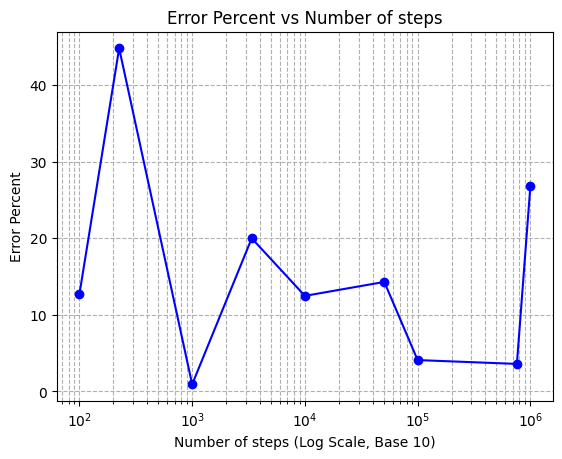


Korelasi (Pearson r) antara n_steps dan error percent: 0.0228


In [65]:
plt.plot(n_steps_variations, error_percents_nstep, 'bo-')
plt.xscale('log', base=10)
plt.xlabel('Number of steps (Log Scale, Base 10)')
plt.ylabel('Error Percent')
plt.title('Error Percent vs Number of steps')
plt.grid(True, which="both", ls="--")
plt.show()

correlation = np.corrcoef(n_steps_variations, error_percents_nstep)[0, 1]
print(f"\nKorelasi (Pearson r) antara n_steps dan error percent: {correlation:.4f}")

In [100]:
import numpy as np
import time

# --- Parameter Simulasi ---
n_steps = 10**5
n_runs_variations = [10, 20, 40, 80, 160, 320, 640]   # Jumlah pengulangan untuk setiap variasi n_steps
dt = 1.0
D = 1.0
sigma = np.sqrt(2 * D * dt)

print("Memulai Simulasi Gerak Brownian dengan Variasi n_steps")
print("-" * 60)
error_percents_nvariation = []
# --- Loop untuk setiap variasi n_steps ---
for n_run in n_runs_variations:
    print(f"\n>>> Memproses untuk n_run = {n_run:,.0f}")
    
    final_r_squared = []
    total_time_start = time.time()

    # --- Lakukan simulasi sebanyak n_runs ---
    for i in range(n_run):
        run_time_start = time.time()
        
        # Inisialisasi posisi awal
        x, y = 0.0, 0.0
        
        # Simulasi gerak acak (tanpa menyimpan histori posisi)
        # Ini lebih efisien dari segi memori untuk n_steps yang sangat besar
        dx_steps = np.random.normal(0, sigma, n_steps)
        dy_steps = np.random.normal(0, sigma, n_steps)
        
        x = np.sum(dx_steps)
        y = np.sum(dy_steps)
        
        # Hitung kuadrat jarak akhir
        r_squared = x**2 + y**2
        final_r_squared.append(r_squared)
        
        run_time_end = time.time()
        if i % 10 == 0:
            print(f"  Run {i+1}/{n_run}: MSD = {r_squared:,.2f} (selesai dalam {run_time_end - run_time_start:.2f} detik)")

    # --- Hitung Rata-rata dan Bandingkan dengan Teori ---
    avg_msd_simulation = np.mean(final_r_squared)
    total_time = n_steps * dt
    msd_theoretical = 4 * D * total_time
    
    total_time_end = time.time()
    
    print("\n--- Hasil Perbandingan ---")
    print(f"Total waktu eksekusi untuk {n_runs} run: {total_time_end - total_time_start:.2f} detik")
    print(f"MSD Rata-rata (Simulasi): {avg_msd_simulation:,.2f}")
    print(f"MSD Teoretis (4*D*t)   : {msd_theoretical:,.2f}")
    
    # Hitung selisih persentase
    error_percent = (abs(avg_msd_simulation - msd_theoretical) / msd_theoretical) * 100
    print(f"Selisih Persentase        : {error_percent:.4f}%")
    print("-" * 60)
    error_percents_nvariation.append(error_percent)


print("\nSimulasi Selesai.")

Memulai Simulasi Gerak Brownian dengan Variasi n_steps
------------------------------------------------------------

>>> Memproses untuk n_run = 10
  Run 1/10: MSD = 232,867.24 (selesai dalam 0.00 detik)

--- Hasil Perbandingan ---
Total waktu eksekusi untuk 10 run: 0.03 detik
MSD Rata-rata (Simulasi): 356,987.56
MSD Teoretis (4*D*t)   : 400,000.00
Selisih Persentase        : 10.7531%
------------------------------------------------------------

>>> Memproses untuk n_run = 20
  Run 1/20: MSD = 358,732.68 (selesai dalam 0.00 detik)
  Run 11/20: MSD = 67,968.43 (selesai dalam 0.00 detik)

--- Hasil Perbandingan ---
Total waktu eksekusi untuk 10 run: 0.05 detik
MSD Rata-rata (Simulasi): 360,721.92
MSD Teoretis (4*D*t)   : 400,000.00
Selisih Persentase        : 9.8195%
------------------------------------------------------------

>>> Memproses untuk n_run = 40
  Run 1/40: MSD = 208,940.78 (selesai dalam 0.00 detik)
  Run 11/40: MSD = 766,937.80 (selesai dalam 0.00 detik)
  Run 21/40: MSD =

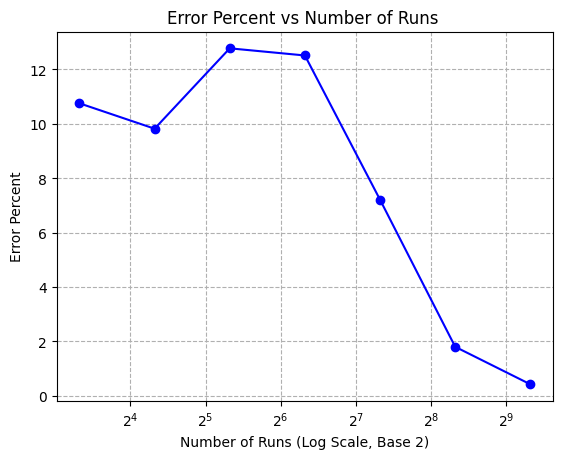


Korelasi (Pearson r) antara n_runs dan error percent: -0.9019


In [101]:

plt.plot(n_runs_variations, error_percents_nvariation, 'bo-')
# plt.xscale('log', base=2)
plt.xscale('log', base=2)
plt.xlabel('Number of Runs (Log Scale, Base 2)')
plt.ylabel('Error Percent')
plt.title('Error Percent vs Number of Runs ')
plt.grid(True, which="both", ls="--")
plt.show()

correlation = np.corrcoef(n_runs_variations, error_percents_nvariation)[0, 1]
print(f"\nKorelasi (Pearson r) antara n_runs dan error percent: {correlation:.4f}")